 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_df = pd.read_csv(Path('Resources/whale_returns.csv'), index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(Path('Resources/algo_returns.csv'), index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [6]:
# Count nulls
algo_returns_df.isnull().sum()
algo_returns_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [31]:
# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv(Path('Resources/sp500_history.csv'), index_col = 'Date', infer_datetime_format = True, parse_dates = True)
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df.head()

C:\Users\sdhol\AppData\Local\Temp\ipykernel_19188\1064410155.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [33]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [35]:
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

In [36]:
# Calculate Daily Returns
sp500_history_df = sp500_history_df.pct_change()
sp500_history_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [37]:
# Drop nulls
sp500_history_df.dropna(inplace=True)

In [38]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df.rename(columns = {'Close':'S&P 500'},inplace=True)
sp500_history_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [39]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis='columns', join='inner')
returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

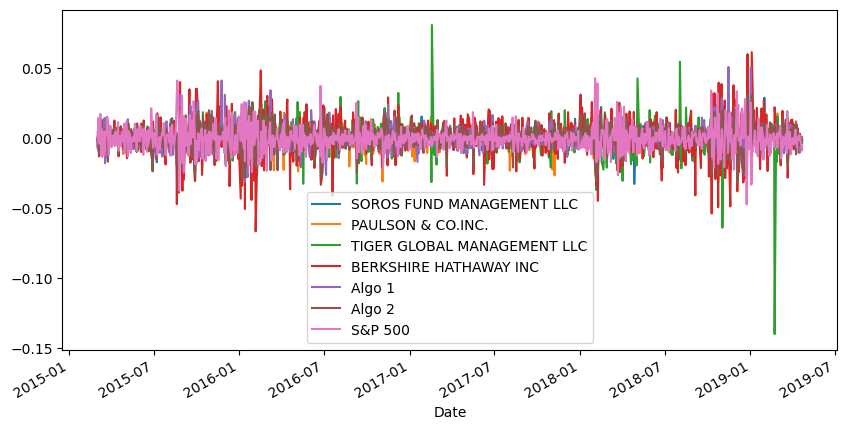

In [40]:
# Plot daily returns of all portfolios
returns_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

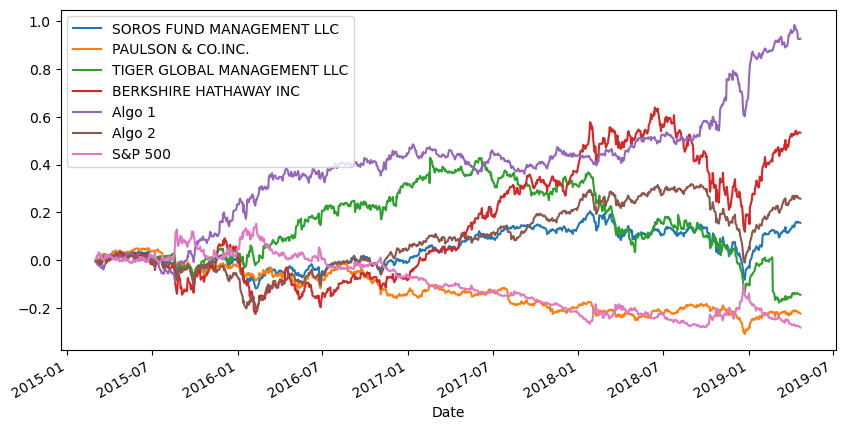

In [41]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df =  (1 + returns_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns_df.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

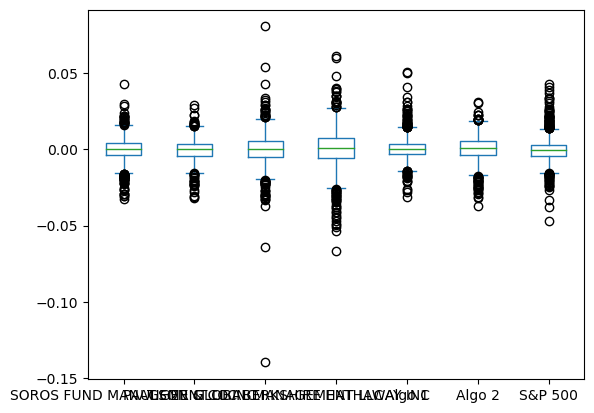

In [42]:
# Box plot to visually show risk
returns_df.plot.box()

### Calculate Standard Deviations

In [43]:
# Calculate the daily standard deviations of all portfolios
returns_std = returns_df.std()
returns_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [44]:
# Calculate  the daily standard deviation of S&P 500
returns_std = returns_std.sort_values(ascending=False)
returns_std
# Determine which portfolios are riskier than the S&P 500
# Portfoios with higher standard deviation than the S&P 500 are considered riskier, in this case the Berkshire Hathaway and Tiger Global Management portfolios are riskier than the S&P 500.

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = returns_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

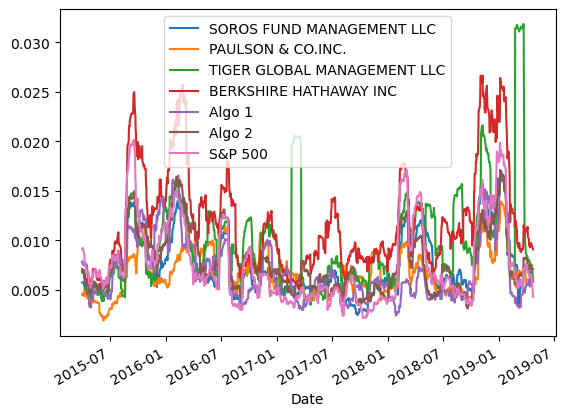

In [46]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window, Plot the rolling standard deviation
returns_df.rolling(window=21).std().plot()


### Calculate and plot the correlation

In [47]:
# Calculate the correlation
correlation = returns_df.corr()
correlation
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

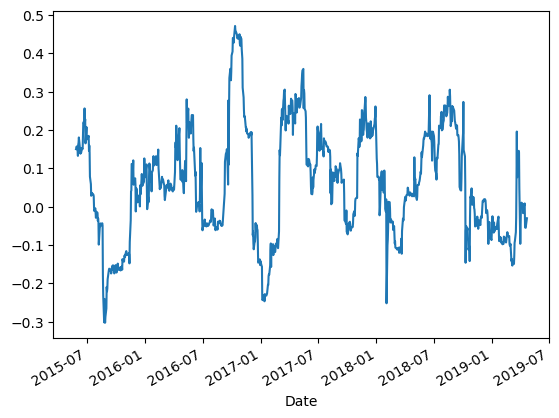

In [48]:
# Calculate covariance of a single portfolio
algo2_covariance = returns_df['Algo 2'].cov(returns_df['S&P 500'])
# Calculate variance of S&P 500
variance = returns_df['S&P 500'].var()
# Computing beta
algo2_beta = algo2_covariance / variance
algo2_beta
# Plot beta trend
rolling_algo2_covariance = returns_df['Algo 2'].rolling(window=60).cov(returns_df['S&P 500'])
rolling_variance = returns_df['S&P 500'].rolling(window=60).var()
rolling_algo2_beta = rolling_algo2_covariance / rolling_variance
rolling_algo2_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [49]:
# Use `ewm` to calculate the rolling window
returns_std.ewm(halflife=21)

ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Annualized Sharpe Ratios
sharpe_ratios = (returns_df.mean() * 252) / (returns_df.std() * np.sqrt(252))
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

<Axes: >

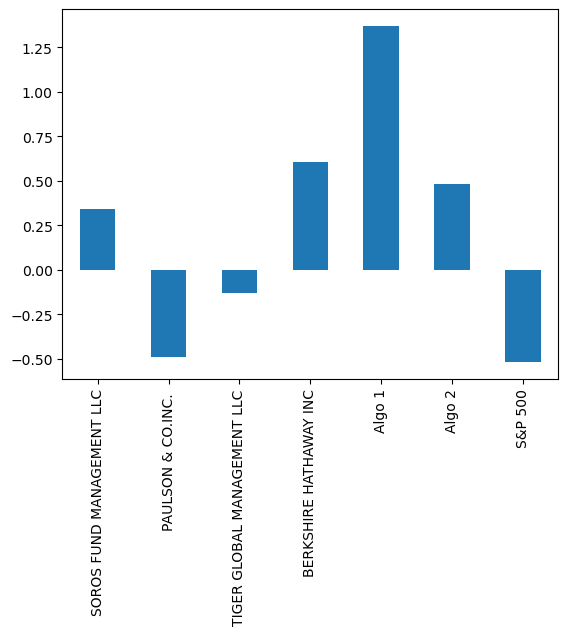

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 according to the Sharpe Ratio approach is the clear winner at producing returns while minimizing risk/volatility while Algo 2 beat all whale portoflios apart from Berkshire Hathaway. During this time period the S&P 500 was the worst performing portfolio of stocks.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [52]:
# Reading data from 1st stock
tgt_df = pd.read_csv(Path('Resources/tgt_historical.csv'), index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [53]:
# Reading data from 2nd stock
sbux_df = pd.read_csv(Path('Resources/sbux_historical.csv'), index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [54]:
# Reading data from 3rd stock
dis_df = pd.read_csv(Path('Resources/dis_historical.csv'), infer_datetime_format = True, index_col = 'Date', parse_dates = True)

In [55]:
# Combine all stocks in a single DataFrame
my_stocks_df = pd.concat([tgt_df, sbux_df, dis_df], axis = 'columns', join = 'inner')

In [56]:
# Reset Date index
my_stocks_df.head()

,tgt,sbux,dis
Date,,,
2012-10-01,62.99,25.07,52.07
2012-10-02,62.98,24.65,51.64
2012-10-03,63.09,24.75,52.47
2012-10-04,63.65,24.55,52.63
2012-10-05,64.18,24.37,52.97


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [57]:
# Calculate daily returns
my_returns_df = my_stocks_df.pct_change()
# Drop NAs
my_returns_df.dropna(inplace=True)
# Display sample data
my_returns_df.head()

,tgt,sbux,dis
Date,,,
2012-10-02,-0.000159,-0.016753,-0.008258
2012-10-03,0.001747,0.004057,0.016073
2012-10-04,0.008876,-0.008081,0.003049
2012-10-05,0.008327,-0.007332,0.006460
2012-10-08,-0.002960,0.000410,-0.012082


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [59]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns_df = my_returns_df.dot(weights)
#portfolio_returns_df.rename(columns = {'0':'My Portfolio'}, inplace = True)

# Display sample data
portfolio_returns_df.head()

Date
2012-10-02   -0.008390
2012-10-03    0.007292
2012-10-04    0.001282
2012-10-05    0.002485
2012-10-08   -0.004877
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [61]:
# Join your returns DataFrame to the original returns DataFrame
returns_df['My Portfolio'] = portfolio_returns_df 
returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.002043
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.006975
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.002431
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.013115
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.013459


In [62]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns_df.dropna(inplace=True)
returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.002043
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.006975
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.002431
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.013115
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.013459


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [63]:
# Calculate the annualized `std`
returns_std = returns_df.std()
returns_std = returns_std.sort_values(ascending=False)
annualized_std = returns_std * np.sqrt(252)
annualized_std.head(10)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
My Portfolio                   0.161777
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

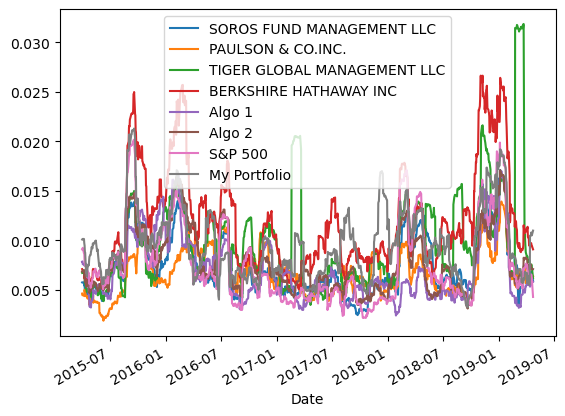

In [64]:
# Calculate rolling standard deviation
returns_df.rolling(window=21).std().plot()
# Plot rolling standard deviation


### Calculate and plot the correlation

In [65]:
# Calculate and plot the correlation
correlation = returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.578606
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.445769
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.455469
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.484880
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.172527
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.581561
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,-0.022858
My Portfolio,0.578606,0.445769,0.455469,0.484880,0.172527,0.581561,-0.022858,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

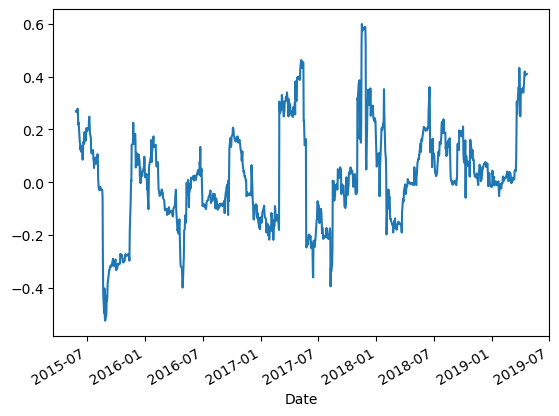

In [66]:
# Calculate and plot Beta
rolling_my_portfolio_covariance = returns_df['My Portfolio'].rolling(window=60).cov(returns_df['S&P 500'])
rolling_variance = returns_df['S&P 500'].rolling(window=60).var()
rolling_my_portfolio_beta = rolling_my_portfolio_covariance / rolling_variance
rolling_my_portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [68]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = (returns_df.mean() * 252) / (returns_df.std() * np.sqrt(252))
all_sharpe_ratios.head(10)

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
My Portfolio                   0.522318
dtype: float64

<Axes: >

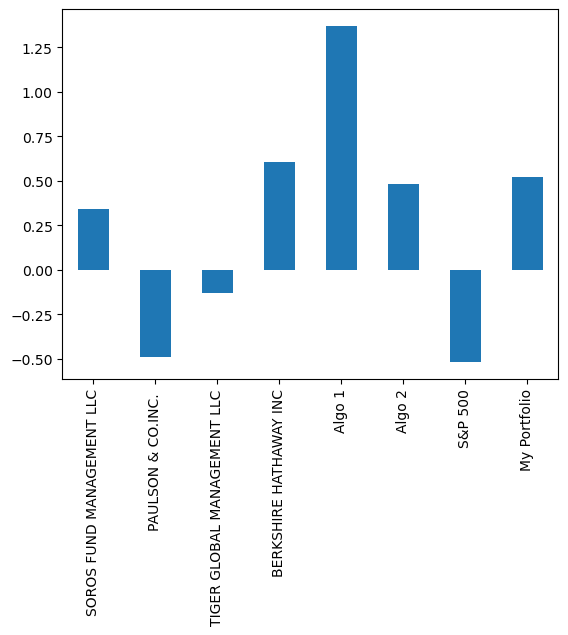

In [69]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot.bar()

### How does your portfolio do?
More volatile than the S&P 500 based on standard variation. However, the sharpe ratio analysis suggests that for that extra volatility the returns are respectively higher than the S&P. Out of all portoflios we've analyzed, it comes in 3rd with regards to how well it generates returns for the risk.
